# Modeling

In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to load
# !pip install lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import numpy as np
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:09.121508


In [2]:
%%time
vars = pd.read_csv('vars_final.csv')
print(vars.shape)
vars.head()

(96397, 22)
CPU times: user 298 ms, sys: 96.4 ms, total: 395 ms
Wall time: 581 ms


,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,card_state_total_30,card_state_avg_7,card_zip_avg_3,...,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,3,0
3,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,4,0
4,7.24,3.62,7.24,7.24,7.24,7.24,3.62,7.24,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,5,0


In [3]:
final_vars = pd.read_csv('final_vars_list.csv')
final_vars

,variable name
0,card_zip_total_3
1,card_state_max_30
2,card_merch_total_14
3,card_merch_total_0
4,card_state_total_0
5,card_zip_total_0
6,card_zip_max_30
7,card_state_total_30
8,card_state_avg_7
9,card_zip_avg_3


In [4]:
numvars = min(20,len(final_vars))
final_vars_list = ['Recnum','Fraud']
for i in range(numvars):
    final_vars_list.append(final_vars.iloc[i]['variable name'])
    
final_vars_list

['Recnum',
 'Fraud',
 'card_zip_total_3',
 'card_state_max_30',
 'card_merch_total_14',
 'card_merch_total_0',
 'card_state_total_0',
 'card_zip_total_0',
 'card_zip_max_30',
 'card_state_total_30',
 'card_state_avg_7',
 'card_zip_avg_3',
 'card_merch_total_30',
 'card_state_total_7',
 'card_zip_avg_14',
 'card_zip_max_14',
 'card_merch_avg_7',
 'card_merch_avg_3',
 'card_merch_avg_14',
 'card_merch_max_30',
 'card_zip_avg_7',
 'card_state_max_0']

In [5]:
vars = vars.filter(final_vars_list,axis=1)
vars.head()

,Recnum,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,card_state_total_30,...,card_merch_total_30,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,7.24,7.24,7.24,7.24,3.62,7.24,...,7.24,7.24,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62


In [6]:
vars.shape

(96397, 22)

In [7]:
# use this to cap variables. For some problems it helps
Clip = 10

In [8]:
# vars.rename(columns={'fraud_label':'Fraud'},inplace=True)

In [9]:
vars['Fraud'].sum()

1059

In [10]:
vars.head(10)

,Recnum,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,card_state_total_30,...,card_merch_total_30,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,7.24,7.24,7.24,7.24,3.62,7.24,...,7.24,7.24,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
5,6,0,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,...,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67,3.67
6,7,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
7,8,0,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,...,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32,230.32
8,9,0,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,...,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11,62.11
9,10,0,10.86,3.62,10.86,10.86,10.86,10.86,3.62,10.86,...,10.86,10.86,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62


In [11]:
vars.shape

(96397, 22)

In [12]:
vars.describe()

,Recnum,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,card_state_total_30,...,card_merch_total_30,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,...,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,48365.481820,0.010986,642.134217,708.830671,773.368966,529.059538,553.964679,531.796481,535.723534,1664.687874,...,929.884025,901.707079,402.213988,494.320870,399.827768,398.093368,401.892259,515.250618,399.970814,432.185986
std,27945.003883,0.104236,4066.803407,1298.414342,4170.824310,2622.052105,2640.513216,2623.087903,1087.420545,5178.642555,...,4306.481459,4244.995444,785.367383,1055.644141,792.356042,797.150660,791.082363,1079.857559,787.764777,944.233287
min,1.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,24154.000000,0.000000,58.350000,87.030000,77.340000,46.620000,49.120000,47.330000,59.700000,166.950000,...,94.290000,87.500000,42.120000,50.850000,38.490000,36.386667,40.000000,53.100000,39.910000,38.860000
50%,48365.000000,0.000000,185.770000,325.540000,238.610000,159.400000,169.000000,160.940000,216.710000,538.320000,...,291.600000,279.990000,160.240000,192.000000,150.820000,146.820000,157.595000,200.000000,153.620000,152.490000
75%,72578.000000,0.000000,556.940000,919.010000,681.800000,494.000000,514.680000,495.900000,622.270000,1604.900000,...,834.000000,837.000000,455.000000,555.000000,447.376667,441.440000,452.940000,591.900000,449.000000,470.000000
max,96753.000000,1.000000,306633.410000,47900.000000,306633.410000,217467.180000,217467.180000,217467.180000,47900.000000,306633.410000,...,306633.410000,306633.410000,28392.840000,47900.000000,28392.840000,28392.840000,28392.840000,47900.000000,28392.840000,47900.000000


In [13]:
record_save = vars['Recnum']
Y_save = pd.DataFrame(vars.loc[:,'Fraud'])
Y_save.head()

,Fraud
0,0
1,0
2,0
3,0
4,0


## Scale and truncate field values

In [14]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,card_state_total_30,card_state_avg_7,card_zip_avg_3,card_merch_total_30,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,642.134217,708.830671,773.368966,529.059538,553.964679,531.796481,535.723534,1664.687874,399.626537,398.094526,929.884025,901.707079,402.213988,494.320870,399.827768,398.093368,401.892259,515.250618,399.970814,432.185986
std,4066.803407,1298.414342,4170.824310,2622.052105,2640.513216,2623.087903,1087.420545,5178.642555,755.051315,793.940822,4306.481459,4244.995444,785.367383,1055.644141,792.356042,797.150660,791.082363,1079.857559,787.764777,944.233287
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,58.350000,87.030000,77.340000,46.620000,49.120000,47.330000,59.700000,166.950000,46.782500,37.300000,94.290000,87.500000,42.120000,50.850000,38.490000,36.386667,40.000000,53.100000,39.910000,38.860000
50%,185.770000,325.540000,238.610000,159.400000,169.000000,160.940000,216.710000,538.320000,171.500000,148.140000,291.600000,279.990000,160.240000,192.000000,150.820000,146.820000,157.595000,200.000000,153.620000,152.490000
75%,556.940000,919.010000,681.800000,494.000000,514.680000,495.900000,622.270000,1604.900000,465.960000,442.850000,834.000000,837.000000,455.000000,555.000000,447.376667,441.440000,452.940000,591.900000,449.000000,470.000000
max,306633.410000,47900.000000,306633.410000,217467.180000,217467.180000,217467.180000,47900.000000,306633.410000,28392.840000,28392.840000,306633.410000,306633.410000,28392.840000,47900.000000,28392.840000,28392.840000,28392.840000,47900.000000,28392.840000,47900.000000


In [15]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [16]:
# push in any outlier values
cols = X.columns
X.loc[:,cols] = X[cols].clip(upper=Clip)
X.loc[:,cols] = X[cols].clip(lower=-1*Clip)
# X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()
X.describe()

,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,card_state_total_30,card_state_avg_7,card_zip_avg_3,card_merch_total_30,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,-0.012607,-0.010834,-0.012329,-0.011778,-0.011640,-0.011770,-0.011285,-0.009957,-0.007548,-0.007785,-0.011711,-0.012050,-0.007935,-0.011455,-0.007799,-0.007824,-0.007952,-0.011796,-0.007746,-0.010663
std,0.448265,0.821922,0.489347,0.482831,0.495104,0.483555,0.782773,0.707508,0.857363,0.854316,0.540322,0.517064,0.850289,0.771966,0.853897,0.854300,0.850657,0.768307,0.853920,0.795119
min,-0.157894,-0.545913,-0.185421,-0.201769,-0.209791,-0.202733,-0.492646,-0.321451,-0.529257,-0.501403,-0.215924,-0.212414,-0.512122,-0.468255,-0.504594,-0.499383,-0.508016,-0.477138,-0.507716,-0.457700
25%,-0.143549,-0.478892,-0.166880,-0.183993,-0.191192,-0.184693,-0.437755,-0.289214,-0.467311,-0.454435,-0.194032,-0.191804,-0.458504,-0.420095,-0.456030,-0.453749,-0.457465,-0.427974,-0.457066,-0.416556
50%,-0.112217,-0.295199,-0.128214,-0.140981,-0.145792,-0.141382,-0.293367,-0.217503,-0.302134,-0.314828,-0.148215,-0.146459,-0.308103,-0.286385,-0.314262,-0.315214,-0.308814,-0.291937,-0.312721,-0.296215
75%,-0.020949,0.161874,-0.021955,-0.013371,-0.014878,-0.013685,0.079589,-0.011545,0.087853,0.056371,-0.022265,-0.015243,0.067212,0.057481,0.060010,0.054377,0.064529,0.070981,0.062238,0.040047
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [17]:
# separate data into modeling (traintest) and out of time
oot_recnum=84300
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [18]:
niter = 0
nitermax = 10
FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

## Models. You can comment out any of these cells and just explore one model type. You can also just rerun that single cell multiple times as you explore different model hyperparameters.

In [51]:
# %%time
# # Logistic regression

# for niter in range(nitermax):    
#     X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = LogisticRegression(penalty='none',C=8, solver='lbfgs', max_iter=1000, random_state=None)
 
#     X_oot = X_oot_orig.copy()
#     X_trn_save = X_trn.copy()
#     Y_trn_save = Y_trn.copy()

#     model.fit(X_trn, Y_trn.values.ravel())   

#     predictions = model.predict_proba(X_trn_save)[:,1]
#     X_trn['predicted'] = predictions
#     X_trn['Fraud'] = Y_trn_save['Fraud']
#     topRows = int(round(X_trn.shape[0]*0.03))
#     temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_tst)[:,1]
#     X_tst['predicted']=predictions
#     X_tst['Fraud'] = Y_tst['Fraud']
#     topRows = int(round(X_tst.shape[0]*0.03))
#     temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_oot)[:,1]
#     X_oot['predicted']=predictions
#     X_oot['Fraud'] = Y_oot['Fraud']
#     topRows = int(round(X_oot.shape[0]*0.03))
#     temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#     print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
# print(FDR3.mean())

In [52]:
# %%time
# # Single DT

# for niter in range(nitermax):    
#     X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = DecisionTreeClassifier(criterion="entropy",max_features=None,max_depth=5, min_samples_leaf=72,min_samples_split=20,min_weight_fraction_leaf=0, splitter="best" )
 
#     X_oot = X_oot_orig.copy()
#     X_trn_save = X_trn.copy()
#     Y_trn_save = Y_trn.copy()

#     model.fit(X_trn, Y_trn.values.ravel())   

#     predictions = model.predict_proba(X_trn_save)[:,1]
#     X_trn['predicted'] = predictions
#     X_trn['Fraud'] = Y_trn_save['Fraud']
#     topRows = int(round(X_trn.shape[0]*0.03))
#     temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_tst)[:,1]
#     X_tst['predicted']=predictions
#     X_tst['Fraud'] = Y_tst['Fraud']
#     topRows = int(round(X_tst.shape[0]*0.03))
#     temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_oot)[:,1]
#     X_oot['predicted']=predictions
#     X_oot['Fraud'] = Y_oot['Fraud']
#     topRows = int(round(X_oot.shape[0]*0.03))
#     temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#     print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
# print(FDR3.mean())

In [54]:
%%time
# RF

for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)
    model = RandomForestClassifier(n_estimators=120,criterion="gini",max_depth=14,  min_samples_leaf=70,min_samples_split=10,max_features='auto')
    
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
print(FDR3.mean())

0 0.807570977917981 0.7642276422764228 0.5698324022346368
1 0.8161888701517707 0.7526132404181185 0.5698324022346368
2 0.7964743589743589 0.76953125 0.5754189944134078
3 0.7940691927512356 0.7912087912087912 0.5754189944134078
4 0.8175895765472313 0.7669172932330827 0.5754189944134078
5 0.7983193277310925 0.7824561403508772 0.5810055865921788
6 0.8156606851549756 0.7940074906367042 0.5810055865921788
7 0.8083735909822867 0.7953667953667953 0.5698324022346368
8 0.8294701986754967 0.7463768115942029 0.5754189944134078
9 0.8022875816993464 0.8022388059701493 0.5810055865921788
trn    0.808600
tst    0.776494
oot    0.575419
dtype: float64
CPU times: user 3min 35s, sys: 5.77 s, total: 3min 41s
Wall time: 4min 17s


In [55]:
# %%time
# # BT

# for niter in range(nitermax):    
#     X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = lgb.LGBMClassifier(boosting_type='goss', num_leaves=100, max_depth= 4, learning_rate=0.001, n_estimators=30, min_child_samples=22)
#     X_oot = X_oot_orig.copy()
#     X_trn_save = X_trn.copy()
#     Y_trn_save = Y_trn.copy()

#     model.fit(X_trn, Y_trn.values.ravel())   

#     predictions = model.predict_proba(X_trn_save)[:,1]
#     X_trn['predicted'] = predictions
#     X_trn['Fraud'] = Y_trn_save['Fraud']
#     topRows = int(round(X_trn.shape[0]*0.03))
#     temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_tst)[:,1]
#     X_tst['predicted']=predictions
#     X_tst['Fraud'] = Y_tst['Fraud']
#     topRows = int(round(X_tst.shape[0]*0.03))
#     temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_oot)[:,1]
#     X_oot['predicted']=predictions
#     X_oot['Fraud'] = Y_oot['Fraud']
#     topRows = int(round(X_oot.shape[0]*0.03))
#     temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#     print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
# print(FDR3.mean())

In [56]:
# %%time
# # NN

# for niter in range(nitermax):  
#     X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = MLPClassifier(activation='tanh', alpha=0.01,\
#     learning_rate='constant', \
#     learning_rate_init=0.001, power_t=0.6, max_iter=1000)

#     X_oot = X_oot_orig.copy()
#     X_trn_save = X_trn.copy()
#     Y_trn_save = Y_trn.copy()

#     model.fit(X_trn, Y_trn.values.ravel())   

#     predictions = model.predict_proba(X_trn_save)[:,1]
#     X_trn['predicted'] = predictions
#     X_trn['Fraud'] = Y_trn_save['Fraud']
#     topRows = int(round(X_trn.shape[0]*0.03))
#     temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_tst)[:,1]
#     X_tst['predicted']=predictions
#     X_tst['Fraud'] = Y_tst['Fraud']
#     topRows = int(round(X_tst.shape[0]*0.03))
#     temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

#     predictions = model.predict_proba(X_oot)[:,1]
#     X_oot['predicted']=predictions
#     X_oot['Fraud'] = Y_oot['Fraud']
#     topRows = int(round(X_oot.shape[0]*0.03))
#     temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
#     needed = temp.loc[:,'Fraud']
#     FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
#     print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    
# print(FDR3.mean())

In [57]:
print('duration: ', datetime.now() - start_time)

duration:  0:06:58.646731


## The rest of the notebook makes the tables for your final model of choice. You need to run that final model only once (no CV). If you want you can run the below cell over and over by itself until it gives you a model you like. But you can't change from your best hyperparameters.

In [220]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

# here's where you put your final model of choice
model = RandomForestClassifier(n_estimators=120,criterion="gini",max_depth=14,  min_samples_leaf=70,min_samples_split=10,max_features='auto')

X_oot = X_oot_orig.copy()
X_trn_save = X_trn.copy()
Y_trn_save = Y_trn.copy()

model.fit(X_trn, Y_trn.values.ravel())   

predictions = model.predict_proba(X_trn_save)[:,1]
X_trn['predicted'] = predictions
X_trn['Fraud'] = Y_trn_save['Fraud']
topRows = int(round(X_trn.shape[0]*0.03))
temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

predictions = model.predict_proba(X_tst)[:,1]
X_tst['predicted']=predictions
X_tst['Fraud'] = Y_tst['Fraud']
topRows = int(round(X_tst.shape[0]*0.03))
temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

predictions = model.predict_proba(X_oot)[:,1]
X_oot['predicted']=predictions
X_oot['Fraud'] = Y_oot['Fraud']
topRows = int(round(X_oot.shape[0]*0.03))
temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
needed = temp.loc[:,'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])

0 0.8213689482470785 0.7473309608540926 0.5810055865921788


In [46]:
final_vars['Feature Importance']=model.feature_importances_

In [53]:
final_vars.sort_values('Feature Importance', ascending=False)

,variable name,Feature Importance
0,card_zip_total_3,0.153114
2,card_merch_total_14,0.133311
11,card_state_total_7,0.130763
5,card_zip_total_0,0.126156
3,card_merch_total_0,0.067290
10,card_merch_total_30,0.053592
4,card_state_total_0,0.045423
17,card_merch_max_30,0.041667
13,card_zip_max_14,0.040811
1,card_state_max_30,0.035687


In [55]:
ks=pd.read_csv('VarsFS.csv')
ks.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,add variables in this order,variable name
0,"(2,)",[0.44827586 0.56321839 0.82758621 0.6744186 0...,0.615170,"('card_zip_total_3',)",0.109339,0.147216,0.049072,1.0,card_zip_total_3
1,"(2, 53)",[0.49425287 0.62068966 0.72413793 0.8255814 0...,0.658019,"('card_zip_total_3', 'card_state_max_30')",0.103480,0.139328,0.046443,2.0,card_state_max_30
2,"(2, 4, 53)",[0.57471264 0.6091954 0.8045977 0.8255814 0...,0.683360,"('card_zip_total_3', 'card_merch_total_14', 'c...",0.097236,0.130920,0.043640,3.0,card_merch_total_14
3,"(2, 4, 31, 53)",[0.57471264 0.6091954 0.8045977 0.8255814 0...,0.692555,"('card_zip_total_3', 'card_merch_total_14', 'c...",0.098958,0.133239,0.044413,4.0,card_merch_total_0
4,"(2, 4, 31, 32, 53)",[0.56321839 0.6091954 0.8045977 0.8255814 0...,0.691406,"('card_zip_total_3', 'card_merch_total_14', 'c...",0.099743,0.134296,0.044765,5.0,card_state_total_0


In [32]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [33]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,card_state_total_30,card_state_avg_7,card_zip_avg_3,...,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0,predicted,Fraud
89129,7.331398,2.242003,7.117087,2.775437,2.746601,2.773298,2.836213,5.559913,0.964741,0.919414,...,0.924206,2.960808,0.919066,0.915714,0.917936,2.875036,0.924241,1.765617,0.790803,1
89128,7.238920,2.242003,7.026916,2.632004,2.604170,2.629921,2.836213,5.487290,1.003045,0.955843,...,0.961032,2.960808,0.955567,0.951995,0.954496,2.875036,0.960955,1.765617,0.790803,1
89121,7.123633,2.242003,6.914504,2.453193,2.426610,2.451181,2.836213,5.396754,1.039499,0.990511,...,0.996079,2.960808,0.990305,0.986524,0.989290,2.875036,0.995895,1.765617,0.783117,1
89120,6.720243,2.242003,6.521174,1.827534,1.805325,1.825769,2.836213,5.079971,1.014335,0.966580,...,0.971886,2.960808,0.966326,0.962689,0.965272,2.875036,0.971776,1.765617,0.781011,1
89117,6.633029,2.242003,6.436136,1.692266,1.671003,1.690555,2.836213,5.011482,1.061025,1.010982,...,1.016774,2.960808,1.010817,1.006913,1.009835,2.875036,1.016527,1.765617,0.781011,1
89114,6.531345,2.242003,6.336987,1.534554,1.514393,1.532905,2.836213,4.931629,1.108416,1.056053,...,1.062336,2.960808,1.055977,1.051802,1.055068,2.875036,1.061950,1.765617,0.779906,1
89074,5.163020,2.242003,5.002788,8.050969,7.985249,8.046747,2.836213,3.857079,1.381339,1.315606,...,1.324723,2.960808,1.316050,1.310310,1.315559,2.875036,1.323539,3.375960,0.757651,1
89077,5.411856,2.242003,5.245419,8.436915,8.368496,8.432540,2.836213,4.052491,1.235400,1.176816,...,1.184418,2.960808,1.176983,1.172079,1.176268,2.875036,1.183661,3.375960,0.757651,1
89075,5.282020,2.242003,5.118821,8.235538,8.168528,8.231243,2.836213,3.950530,1.301985,1.240139,...,1.248432,2.960808,1.240432,1.235147,1.239820,2.875036,1.247480,3.375960,0.757651,1
89183,9.996093,5.843897,9.715324,6.908379,6.850648,6.904608,7.136987,7.652506,1.234945,1.176384,...,1.183980,7.391041,1.176549,1.171648,1.175834,7.205931,1.183225,8.328921,0.726455,1


In [34]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_trn

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.000000
1,1.0,590.0,252.0,338.0,42.711864,57.288136,590.0,252.0,338.0,0.431618,54.08,53.648382,0.745562
2,2.0,590.0,473.0,117.0,80.169492,19.830508,1180.0,725.0,455.0,1.241757,72.80,71.558243,1.593407
3,3.0,590.0,538.0,52.0,91.186441,8.813559,1770.0,1263.0,507.0,2.163227,81.12,78.956773,2.491124
4,4.0,590.0,572.0,18.0,96.949153,3.050847,2360.0,1835.0,525.0,3.142931,84.00,80.857069,3.495238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,590.0,590.0,0.0,100.000000,0.000000,56650.0,56025.0,625.0,95.957866,100.00,4.042134,89.640000
97,97.0,590.0,590.0,0.0,100.000000,0.000000,57240.0,56615.0,625.0,96.968399,100.00,3.031601,90.584000
98,98.0,590.0,590.0,0.0,100.000000,0.000000,57830.0,57205.0,625.0,97.978933,100.00,2.021067,91.528000
99,99.0,590.0,590.0,0.0,100.000000,0.000000,58420.0,57795.0,625.0,98.989466,100.00,1.010534,92.472000


In [35]:
FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,121.0,59.0,62.0,48.760331,51.239669,121.0,59.0,62.0,0.495050,34.636872,34.141822,0.951613
2,2.0,121.0,99.0,22.0,81.818182,18.181818,242.0,158.0,84.0,1.325726,46.927374,45.601649,1.880952
3,3.0,121.0,101.0,20.0,83.471074,16.528926,363.0,259.0,104.0,2.173183,58.100559,55.927375,2.490385
4,4.0,121.0,120.0,1.0,99.173554,0.826446,484.0,379.0,105.0,3.180064,58.659218,55.479154,3.609524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,121.0,0.0,100.000000,0.000000,11613.0,11434.0,179.0,95.938916,100.000000,4.061084,63.877095
97,97.0,121.0,121.0,0.0,100.000000,0.000000,11734.0,11555.0,179.0,96.954187,100.000000,3.045813,64.553073
98,98.0,121.0,121.0,0.0,100.000000,0.000000,11855.0,11676.0,179.0,97.969458,100.000000,2.030542,65.229050
99,99.0,121.0,121.0,0.0,100.000000,0.000000,11976.0,11797.0,179.0,98.984729,100.000000,1.015271,65.905028


In [27]:
FDR3.to_csv('FDR3.csv')

In [28]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [65]:
print("duration: ", datetime.now() - start_time)

duration:  0:08:06.836108


## Plot graph

In [67]:
df_1=pd.read_csv('create_vars.csv', index_col=0)
df_1

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Amount_state_count_1_by_30,Amount_zip_count_0_by_7,Amount_zip_count_0_by_14,Amount_zip_count_0_by_30,Amount_zip_count_1_by_7,Amount_zip_count_1_by_14,Amount_zip_count_1_by_30,Cardnum_U*,Merch_U*,Risk
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,2.178008,NaN,0.02242
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,1.604857,1.000894,0.02242
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,2.368143,1.025818,0.02242
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,1.044105,NaN,0.02242
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,2.178008,NaN,0.02242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2006-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,1.002393,1.000894,0.02242
96393,96750,5142225701,2006-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,1.137948,1.288057,0.02242
96394,96751,5142226486,2006-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,1.201338,1.106055,0.02242
96395,96752,5142244619,2006-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,1.499767,1.029441,0.02242


In [68]:
df_2=pd.read_csv('final_vars_list.csv')
df_2['variable name'].to_list()

['card_zip_total_3',
 'card_state_max_30',
 'card_merch_total_14',
 'card_merch_total_0',
 'card_state_total_0',
 'card_zip_total_0',
 'card_zip_max_30',
 'card_state_total_30',
 'card_state_avg_7',
 'card_zip_avg_3',
 'card_merch_total_30',
 'card_state_total_7',
 'card_zip_avg_14',
 'card_zip_max_14',
 'card_merch_avg_7',
 'card_merch_avg_3',
 'card_merch_avg_14',
 'card_merch_max_30',
 'card_zip_avg_7',
 'card_state_max_0']

In [245]:
merchnum_df=df_1[['Merchnum', 'Date','Fraud', 'card_zip_total_3',
 'card_state_max_30',
 'card_merch_total_14',
 'card_merch_total_0',
 'card_state_total_0',
 'card_zip_total_0',
 'card_zip_max_30',
 'card_state_total_30',
 'card_state_avg_7',
 'card_zip_avg_3',
 'card_merch_total_30',
 'card_state_total_7',
 'card_zip_avg_14',
 'card_zip_max_14',
 'card_merch_avg_7',
 'card_merch_avg_3',
 'card_merch_avg_14',
 'card_merch_max_30',
 'card_zip_avg_7',
 'card_state_max_0']]
merchnum_df

,Merchnum,Date,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,...,card_merch_total_30,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0
0,5509006296254,2006-01-01,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,61003026333,2006-01-01,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,4503082993600,2006-01-01,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,5509006296254,2006-01-01,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5509006296254,2006-01-01,0,7.24,3.62,7.24,7.24,7.24,7.24,3.62,...,7.24,7.24,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,3500000006160,2006-12-31,0,84.79,84.79,84.79,84.79,84.79,84.79,84.79,...,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79,84.79
96393,8090710030950,2006-12-31,0,118.75,1385.00,718.60,118.75,118.75,118.75,599.85,...,718.60,886.25,359.30,599.85,118.75,118.75,359.30,599.85,118.75,118.75
96394,4503057341100,2006-12-31,0,363.56,363.56,363.56,363.56,363.56,363.56,363.56,...,363.56,435.41,363.56,363.56,363.56,363.56,363.56,363.56,363.56,363.56
96395,8834000695412,2006-12-31,0,2202.03,2202.03,2202.03,2202.03,2202.03,2202.03,2202.03,...,2745.63,2202.03,2202.03,2202.03,2202.03,2202.03,2202.03,2202.03,2202.03,2202.03


In [258]:
y=merchnum_df['Fraud']
x=merchnum_df[['card_zip_total_3',
 'card_state_max_30',
 'card_merch_total_14',
 'card_merch_total_0',
 'card_state_total_0',
 'card_zip_total_0',
 'card_zip_max_30',
 'card_state_total_30',
 'card_state_avg_7',
 'card_zip_avg_3',
 'card_merch_total_30',
 'card_state_total_7',
 'card_zip_avg_14',
 'card_zip_max_14',
 'card_merch_avg_7',
 'card_merch_avg_3',
 'card_merch_avg_14',
 'card_merch_max_30',
 'card_zip_avg_7',
 'card_state_max_0']]


In [264]:
predictions = model_final.predict_proba(x)
merchnum_df['Fraud Score']= predictions[:,1]
merchnum_df.head()

,Merchnum,Date,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,...,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0,Fraud Score
0,5509006296254,2006-01-01,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,0.540086
1,61003026333,2006-01-01,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,0.644866
2,4503082993600,2006-01-01,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,0.644866
3,5509006296254,2006-01-01,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,0.540086
4,5509006296254,2006-01-01,0,7.24,3.62,7.24,7.24,7.24,7.24,3.62,...,7.24,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,0.710406


In [215]:
test = ((cardnum_df.groupby('Cardnum')['Fraud Score'].max()-cardnum_df.groupby('Cardnum')['Fraud Score'].mean()).abs()>0.06)&(cardnum_df.groupby('Cardnum')['Cardnum'].count()>30)
# .sort_values(ascending=False).head(450)
#cardnum_df.groupby('Cardnum').size().sort_values(ascending=False).head(40)

In [216]:
test.loc[lambda x:x==True]

Cardnum
5142115571    True
5142121642    True
5142121921    True
5142123027    True
5142123108    True
              ... 
5142299705    True
5142300218    True
5142300588    True
5142300925    True
5142301445    True
Length: 128, dtype: bool

In [265]:
merchnum=merchnum_df[(merchnum_df['Merchnum']== '4574100694444')]
merchnum.head(40)

,Merchnum,Date,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,...,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0,Fraud Score
42131,4574100694444,2006-06-06,1,10239.15,5815.19,5815.19,5815.19,10239.15,10239.15,5815.19,...,15088.62,5119.575000,5815.19,5815.190,5815.190,5815.190,5815.19,5119.575000,5815.19,0.644866
60551,4574100694444,2006-08-08,0,2495.00,2495.00,2495.00,2495.00,2495.00,2495.00,2495.00,...,2495.00,2495.000000,2495.00,2495.000,2495.000,2495.000,2495.00,2495.000000,2495.00,0.644866
60732,4574100694444,2006-08-08,0,2382.00,2382.00,2382.00,2382.00,2382.00,2382.00,2382.00,...,7146.00,1786.500000,2382.00,2382.000,2382.000,2382.000,2382.00,1786.500000,2382.00,0.644866
61207,4574100694444,2006-08-09,0,92.00,169.00,92.00,92.00,92.00,92.00,169.00,...,92.00,92.000000,92.00,92.000,92.000,92.000,92.00,92.000000,92.00,0.644866
61440,4574100694444,2006-08-10,1,3706.02,3706.02,3706.02,3706.02,3706.02,3706.02,3706.02,...,3706.02,3706.020000,3706.02,3706.020,3706.020,3706.020,3706.02,3706.020000,3706.02,0.644866
61482,4574100694444,2006-08-10,0,804.40,804.40,804.40,804.40,804.40,804.40,804.40,...,854.35,804.400000,804.40,804.400,804.400,804.400,804.40,804.400000,804.40,0.644866
61507,4574100694444,2006-08-10,0,358.00,358.00,358.00,358.00,358.00,358.00,358.00,...,358.00,358.000000,358.00,358.000,358.000,358.000,358.00,358.000000,358.00,0.644866
61932,4574100694444,2006-08-10,1,14996.12,5900.44,9606.46,9606.46,14996.12,14996.12,5900.44,...,14996.12,4998.706667,5900.44,4803.230,4803.230,4803.230,5900.44,4998.706667,5900.44,0.644866
63071,4574100694444,2006-08-14,0,2495.00,2495.00,2495.00,2495.00,2495.00,2495.00,2495.00,...,2495.00,2495.000000,2495.00,2495.000,2495.000,2495.000,2495.00,2495.000000,2495.00,0.644866
63133,4574100694444,2006-08-15,0,2201.00,2201.00,2293.00,2201.00,2201.00,2201.00,2201.00,...,2293.00,1146.500000,2201.00,1146.500,2201.000,1146.500,2201.00,1146.500000,2201.00,0.644866


In [243]:
graph_data=cardnum_df[(cardnum_df['Date'] >= '2006-17-15') & (cardnum_df['Date'] <= '2006-07-30')]
graph_data

,Cardnum,Date,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,...,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0,Fraud Score


,Cardnum,Date,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,...,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0,Fraud Score


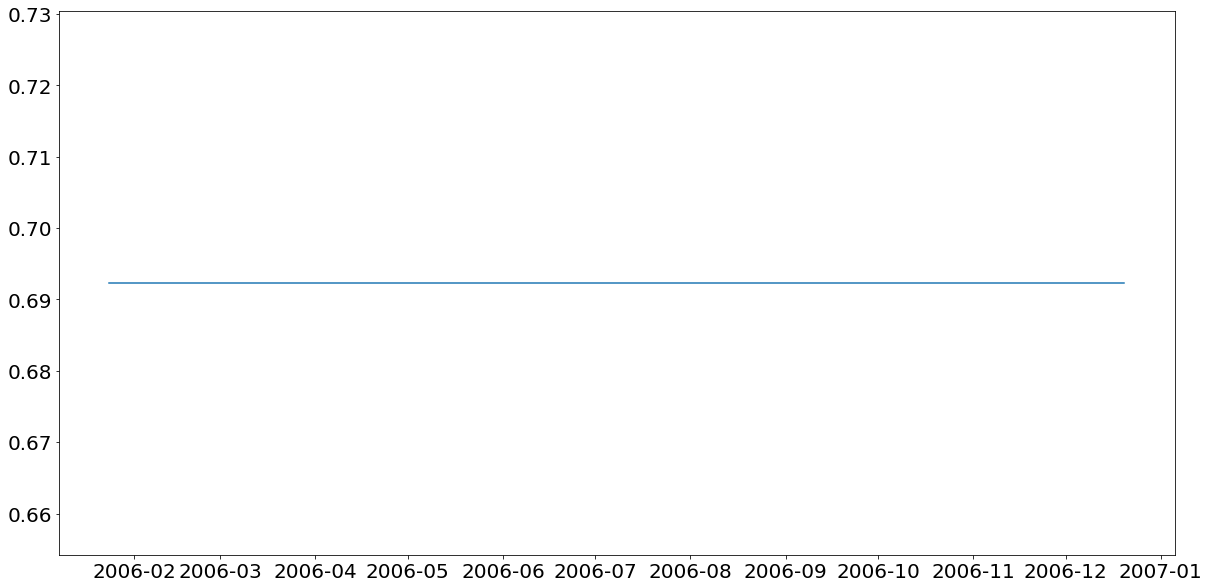

In [239]:
plt.rcParams.update({'figure.figsize':(20,10)})
plt.rcParams.update({'font.size':20})
plt.plot(cardnum['Date'], cardnum['Fraud Score'])
# plt.plot(graph_data['Date'], graph_data['Fraud Score'])

In [207]:
cardnum_df[cardnum_df['Cardnum']== 5142121642].head(20)

,Cardnum,Date,Fraud,card_zip_total_3,card_state_max_30,card_merch_total_14,card_merch_total_0,card_state_total_0,card_zip_total_0,card_zip_max_30,...,card_state_total_7,card_zip_avg_14,card_zip_max_14,card_merch_avg_7,card_merch_avg_3,card_merch_avg_14,card_merch_max_30,card_zip_avg_7,card_state_max_0,Fraud Score
4520,5142121642,2006-01-20,0,409.11,409.11,409.11,409.11,409.11,409.11,409.11,...,409.11,409.110000,409.11,409.110000,409.110000,409.110000,409.11,409.110000,409.11,0.644866
7250,5142121642,2006-02-02,0,59.97,59.97,59.97,59.97,59.97,59.97,59.97,...,59.97,59.970000,59.97,59.970000,59.970000,59.970000,59.97,59.970000,59.97,0.644866
10856,5142121642,2006-02-15,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.620000,3.62,3.620000,3.620000,3.620000,3.62,3.620000,3.62,0.540086
10992,5142121642,2006-02-15,0,7.24,3.62,7.24,7.24,7.24,7.24,3.62,...,7.24,3.620000,3.62,3.620000,3.620000,3.620000,3.62,3.620000,3.62,0.710406
11039,5142121642,2006-02-15,0,10.91,3.67,10.91,10.91,10.91,10.91,3.67,...,10.91,3.636667,3.67,3.636667,3.636667,3.636667,3.67,3.636667,3.67,0.712641
11174,5142121642,2006-02-16,0,14.65,3.74,14.65,3.74,3.74,3.74,3.74,...,14.65,3.662500,3.74,3.662500,3.662500,3.662500,3.74,3.662500,3.74,0.708558
11478,5142121642,2006-02-16,0,18.22,3.74,18.22,7.31,7.31,7.31,3.74,...,18.22,3.644000,3.74,3.644000,3.644000,3.644000,3.74,3.644000,3.74,0.712641
11664,5142121642,2006-02-17,0,21.84,3.74,21.84,3.62,3.62,3.62,3.74,...,21.84,3.640000,3.74,3.640000,3.640000,3.640000,3.74,3.640000,3.62,0.700653
12128,5142121642,2006-02-18,0,1495.00,1495.00,1495.00,1495.00,1495.00,1495.00,1495.00,...,1495.00,1495.000000,1495.00,1495.000000,1495.000000,1495.000000,1495.00,1495.000000,1495.00,0.644866
12251,5142121642,2006-02-18,0,104.46,104.46,104.46,104.46,104.46,104.46,104.46,...,104.46,104.460000,104.46,104.460000,104.460000,104.460000,104.46,104.460000,104.46,0.644866
